In [ ]:
pip install pymongo

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install pygeos

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd

In [ ]:
# import MongoClient
from pymongo import MongoClient

# Creating a client
myClient = MongoClient('localhost', 27017)

# Creating a database name GFG
myDB = myClient['stormsDB']

In [ ]:
stormsTable = myDB["storms"]

### Q1.A

In [ ]:
hurricane_path = 'data/hurdat2-1851-2021-100522.txt'
raw_df = pd.read_csv(hurricane_path, header=None, sep="|")

In [ ]:
raw_df.count()

0    55437
dtype: int64

In [ ]:
storms = {}
header = None
for line in  raw_df[0]:
    tokens = line.split(',')
    if len(tokens) == 4:
        header = line
        storms[header] = []
    elif len(tokens) == 21:
        row = [token.strip() for token in tokens]
        storms[header].append(row)

In [ ]:
len(storms)

1936

In [ ]:
frames = []
#key example: AL011851, UNNAMED, 14,
for storm in storms:
    code, name, entries, blank= [record.strip() for record in storm.split(',')]
    basic_columns = {
        'BASIN' : code[:2],
        'ATCF_CY_NUMBER': code[2:4],
        'YEAR' :code[4:9],
        'NAME' : name,
        'NUM_BEST_TRACK_ENTRIES': entries
    }

    dataset = pd.DataFrame(storms[storm], columns=[
                                                    'DATE',
                                                    'TIME_UTC',
                                                    'POINT_TYPE',
                                                    'STATUS',
                                                    'LATITUDE',
                                                    'LONGITUDE',
                                                    'MAX_WINDSPEED_KT',
                                                    'MIN_PRESURE_MB',
                                                    'NE_34KT',
                                                    'SE_34KT',
                                                    'NW_34_KT',
                                                    'SW_34_KT',
                                                    'NE_50KT',
                                                    'SE_50KT',
                                                    'NW_50_KT',
                                                    'SW_50_KT',
                                                    'NE_64KT',
                                                    'SE_64KT',
                                                    'NW_64_KT',
                                                    'SW_64_KT',
                                                    'RADIUS'

                                                   ]
                          )
    for column in basic_columns:
        dataset[column] = basic_columns[column]
    frames.append(dataset)
final_df = pd.concat(frames)

In [ ]:
final_df.head()

,DATE,TIME_UTC,POINT_TYPE,STATUS,LATITUDE,LONGITUDE,MAX_WINDSPEED_KT,MIN_PRESURE_MB,NE_34KT,SE_34KT,...,NE_64KT,SE_64KT,NW_64_KT,SW_64_KT,RADIUS,BASIN,ATCF_CY_NUMBER,YEAR,NAME,NUM_BEST_TRACK_ENTRIES
0,18510625,0000,,HU,28.0N,94.8W,80,-999,-999,-999,...,-999,-999,-999,-999,-999,AL,01,1851,UNNAMED,14
1,18510625,0600,,HU,28.0N,95.4W,80,-999,-999,-999,...,-999,-999,-999,-999,-999,AL,01,1851,UNNAMED,14
2,18510625,1200,,HU,28.0N,96.0W,80,-999,-999,-999,...,-999,-999,-999,-999,-999,AL,01,1851,UNNAMED,14
3,18510625,1800,,HU,28.1N,96.5W,80,-999,-999,-999,...,-999,-999,-999,-999,-999,AL,01,1851,UNNAMED,14
4,18510625,2100,L,HU,28.2N,96.8W,80,-999,-999,-999,...,-999,-999,-999,-999,-999,AL,01,1851,UNNAMED,14


### Q2.B

In [ ]:
# final_df['LATITUDE'] = final_df['LATITUDE'].str.replace('N', '').astype(float)
final_df['LATITUDE'] = final_df['LATITUDE'] .apply(\
                                                   lambda x: x.replace('N', '')\
                                                   if 'N' in x  \
                                                   else '-' + x.replace('S', ''))
final_df['LONGITUDE'] = final_df['LONGITUDE'] .apply(\
                                                   lambda x: x.replace('E', '')\
                                                   if 'E' in x  \
                                                   else '-' + x.replace('W', ''))

In [ ]:
final_df.head()

,DATE,TIME_UTC,POINT_TYPE,STATUS,LATITUDE,LONGITUDE,MAX_WINDSPEED_KT,MIN_PRESURE_MB,NE_34KT,SE_34KT,...,NE_64KT,SE_64KT,NW_64_KT,SW_64_KT,RADIUS,BASIN,ATCF_CY_NUMBER,YEAR,NAME,NUM_BEST_TRACK_ENTRIES
0,18510625,0000,,HU,28.0,-94.8,80,-999,-999,-999,...,-999,-999,-999,-999,-999,AL,01,1851,UNNAMED,14
1,18510625,0600,,HU,28.0,-95.4,80,-999,-999,-999,...,-999,-999,-999,-999,-999,AL,01,1851,UNNAMED,14
2,18510625,1200,,HU,28.0,-96.0,80,-999,-999,-999,...,-999,-999,-999,-999,-999,AL,01,1851,UNNAMED,14
3,18510625,1800,,HU,28.1,-96.5,80,-999,-999,-999,...,-999,-999,-999,-999,-999,AL,01,1851,UNNAMED,14
4,18510625,2100,L,HU,28.2,-96.8,80,-999,-999,-999,...,-999,-999,-999,-999,-999,AL,01,1851,UNNAMED,14


In [ ]:
final_df['LONGITUDE'] = final_df['LONGITUDE'].astype(float)

In [ ]:
final_df['LATITUDE'] = final_df['LATITUDE'].astype(float)

In [ ]:
final_df["DATE"] = pd.to_datetime(final_df["DATE"],format='%Y%m%d')

In [ ]:
# final_df.assign(TIME_UTC=pd.to_datetime(final_df.TIME_UTC, format='%H%M').dt.strftime('%H:%M'))
final_df['TIME_UTC'] =pd.to_datetime(final_df.TIME_UTC, format='%H%M').dt.strftime('%H:%M')
# final_df['TIME_UTC'] = pd.to_datetime(final_df['TIME_UTC'],format= '%H:%M' ).dt.time

In [ ]:
final_df.dtypes

DATE                      datetime64[ns]
TIME_UTC                          object
POINT_TYPE                        object
STATUS                            object
LATITUDE                         float64
LONGITUDE                        float64
MAX_WINDSPEED_KT                  object
MIN_PRESURE_MB                    object
NE_34KT                           object
SE_34KT                           object
NW_34_KT                          object
SW_34_KT                          object
NE_50KT                           object
SE_50KT                           object
NW_50_KT                          object
SW_50_KT                          object
NE_64KT                           object
SE_64KT                           object
NW_64_KT                          object
SW_64_KT                          object
RADIUS                            object
BASIN                             object
ATCF_CY_NUMBER                    object
YEAR                              object
NAME            

### Q1.C

In [ ]:
final_df[
    ['MAX_WINDSPEED_KT',
    'MIN_PRESURE_MB',
    'NE_34KT',
    'SE_34KT',
    'NW_34_KT',
    'SW_34_KT',
    'NE_50KT',
    'SE_50KT',
    'NW_50_KT',
    'SW_50_KT',
    'NE_64KT',
    'SE_64KT',
    'NW_64_KT',
    'SW_64_KT',
    'RADIUS',
    'NUM_BEST_TRACK_ENTRIES']
] = final_df[
   [ 'MAX_WINDSPEED_KT',
    'MIN_PRESURE_MB',
    'NE_34KT',
    'SE_34KT',
    'NW_34_KT',
    'SW_34_KT',
    'NE_50KT',
    'SE_50KT',
    'NW_50_KT',
    'SW_50_KT',
    'NE_64KT',
    'SE_64KT',
    'NW_64_KT',
    'SW_64_KT',
    'RADIUS',
    'NUM_BEST_TRACK_ENTRIES']
].astype(int)

In [ ]:
final_df.dtypes

DATE                      datetime64[ns]
TIME_UTC                          object
POINT_TYPE                        object
STATUS                            object
LATITUDE                         float64
LONGITUDE                        float64
MAX_WINDSPEED_KT                   int64
MIN_PRESURE_MB                     int64
NE_34KT                            int64
SE_34KT                            int64
NW_34_KT                           int64
SW_34_KT                           int64
NE_50KT                            int64
SE_50KT                            int64
NW_50_KT                           int64
SW_50_KT                           int64
NE_64KT                            int64
SE_64KT                            int64
NW_64_KT                           int64
SW_64_KT                           int64
RADIUS                             int64
BASIN                             object
ATCF_CY_NUMBER                    object
YEAR                              object
NAME            

### Q1.D

In [ ]:
final_df.head()

,DATE,TIME_UTC,POINT_TYPE,STATUS,LATITUDE,LONGITUDE,MAX_WINDSPEED_KT,MIN_PRESURE_MB,NE_34KT,SE_34KT,...,NE_64KT,SE_64KT,NW_64_KT,SW_64_KT,RADIUS,BASIN,ATCF_CY_NUMBER,YEAR,NAME,NUM_BEST_TRACK_ENTRIES
0,1851-06-25,00:00,,HU,28.0,-94.8,80,-999,-999,-999,...,-999,-999,-999,-999,-999,AL,01,1851,UNNAMED,14
1,1851-06-25,06:00,,HU,28.0,-95.4,80,-999,-999,-999,...,-999,-999,-999,-999,-999,AL,01,1851,UNNAMED,14
2,1851-06-25,12:00,,HU,28.0,-96.0,80,-999,-999,-999,...,-999,-999,-999,-999,-999,AL,01,1851,UNNAMED,14
3,1851-06-25,18:00,,HU,28.1,-96.5,80,-999,-999,-999,...,-999,-999,-999,-999,-999,AL,01,1851,UNNAMED,14
4,1851-06-25,21:00,L,HU,28.2,-96.8,80,-999,-999,-999,...,-999,-999,-999,-999,-999,AL,01,1851,UNNAMED,14


In [ ]:
 final_df['PK_DATE_TIME_LAT_LONG'] = final_df['DATE'].astype(str) + '_' + final_df['TIME_UTC'].astype(str) + '_' + final_df['LATITUDE'].astype(str)+'_' + final_df['LONGITUDE'].astype(str)

In [ ]:
final_df.head()

,DATE,TIME_UTC,POINT_TYPE,STATUS,LATITUDE,LONGITUDE,MAX_WINDSPEED_KT,MIN_PRESURE_MB,NE_34KT,SE_34KT,...,SE_64KT,NW_64_KT,SW_64_KT,RADIUS,BASIN,ATCF_CY_NUMBER,YEAR,NAME,NUM_BEST_TRACK_ENTRIES,PK_DATE_TIME_LAT_LONG
0,1851-06-25,00:00,,HU,28.0,-94.8,80,-999,-999,-999,...,-999,-999,-999,-999,AL,01,1851,UNNAMED,14,1851-06-25_00:00_28.0_-94.8
1,1851-06-25,06:00,,HU,28.0,-95.4,80,-999,-999,-999,...,-999,-999,-999,-999,AL,01,1851,UNNAMED,14,1851-06-25_06:00_28.0_-95.4
2,1851-06-25,12:00,,HU,28.0,-96.0,80,-999,-999,-999,...,-999,-999,-999,-999,AL,01,1851,UNNAMED,14,1851-06-25_12:00_28.0_-96.0
3,1851-06-25,18:00,,HU,28.1,-96.5,80,-999,-999,-999,...,-999,-999,-999,-999,AL,01,1851,UNNAMED,14,1851-06-25_18:00_28.1_-96.5
4,1851-06-25,21:00,L,HU,28.2,-96.8,80,-999,-999,-999,...,-999,-999,-999,-999,AL,01,1851,UNNAMED,14,1851-06-25_21:00_28.2_-96.8


### Q1.E

In [ ]:
with open('data/hurricane_1851_2021.json', 'w') as f:
    f.write(final_df.to_json(orient = 'records', compression = 'infer', index = 'false'))


### Q1.F

In [ ]:
import json

items=[]

with open('data/hurricane_1851_2021.json') as f:
    items=json.load(f)

In [ ]:
finalItems= []

for item in items:
    db_item={}
    db_item["PK_DATE_TIME_LAT_LONG"]= item["PK_DATE_TIME_LAT_LONG"]
    db_item["YEAR"]= item["YEAR"]
    del item["PK_DATE_TIME_LAT_LONG"]
    del item["YEAR"]
    db_item["INFO"]=item
    finalItems.append(db_item)

In [ ]:
finalItems[0]

{'PK_DATE_TIME_LAT_LONG': '1851-06-25_00:00_28.0_-94.8',
 'YEAR': '1851',
 'INFO': {'DATE': -3740169600000,
  'TIME_UTC': '00:00',
  'POINT_TYPE': '',
  'STATUS': 'HU',
  'LATITUDE': 28.0,
  'LONGITUDE': -94.8,
  'MAX_WINDSPEED_KT': 80,
  'MIN_PRESURE_MB': -999,
  'NE_34KT': -999,
  'SE_34KT': -999,
  'NW_34_KT': -999,
  'SW_34_KT': -999,
  'NE_50KT': -999,
  'SE_50KT': -999,
  'NW_50_KT': -999,
  'SW_50_KT': -999,
  'NE_64KT': -999,
  'SE_64KT': -999,
  'NW_64_KT': -999,
  'SW_64_KT': -999,
  'RADIUS': -999,
  'BASIN': 'AL',
  'ATCF_CY_NUMBER': '01',
  'NAME': 'UNNAMED',
  'NUM_BEST_TRACK_ENTRIES': 14}}

In [ ]:
stormsTable.insert_many(finalItems)

### Q2.A

In [ ]:
data = stormsTable.find({})

In [ ]:
count=0
for i in data:
    count+=1
print(count)

53501


### Q2.B

In [ ]:
data1 = stormsTable.find({
    'INFO.STATUS': {"$eq": 'HU'},
    'YEAR' : {"$gte": "2020", "$lte": "2021"}
})

In [ ]:
count=0
for i in data1:
    count+=1
print(count)

273


### Q2.C

In [ ]:
data = stormsTable.find({
    'INFO.MAX_WINDSPEED_KT' : {"$gte": 112.97, "$lte": 135.56},
    'YEAR' : {"$gte": "2000"}
})

In [ ]:
c=0
resList=[]
for i in data:
    if isinstance(i, list):
        for i1 in i:
            resList.append({
                "YEAR": i1['YEAR'],
                "NAME": i1['INFO']["NAME"],

            })
            # print(i1['INFO'])
    else:
        resList.append({
                "YEAR": i['YEAR'],
                "NAME": i['INFO']["NAME"],

            })
        # print(i['YEAR'])
    c+=len(i)
    # print(i)
# print(resList)




In [ ]:
newlist = sorted(resList, key=lambda x: x["YEAR"], reverse=False)

In [ ]:
print("{}\t{}".format('YEAR', 'NAME'))
print("------------------")
dataSet=[]
for item in newlist:
    if item['YEAR']+item['NAME'] not in dataSet:
        print("{}\t{}".format(item['YEAR'], item['NAME']))
        dataSet.append(item['YEAR']+item['NAME'])



YEAR	NAME
------------------
2000	ISAAC
2000	KEITH
2001	IRIS
2001	MICHELLE
2002	LILI
2003	FABIAN
2003	ISABEL
2004	CHARLEY
2004	FRANCES
2004	IVAN
2004	KARL
2005	DENNIS
2005	EMILY
2005	KATRINA
2005	RITA
2005	WILMA
2007	DEAN
2007	FELIX
2008	GUSTAV
2008	IKE
2008	OMAR
2008	PALOMA
2009	BILL
2010	DANIELLE
2010	EARL
2010	IGOR
2010	JULIA
2011	KATIA
2011	OPHELIA
2014	GONZALO
2015	JOAQUIN
2016	MATTHEW
2016	NICOLE
2017	HARVEY
2017	IRMA
2017	JOSE
2017	MARIA
2018	FLORENCE
2018	MICHAEL
2019	DORIAN
2019	LORENZO
2020	LAURA
2020	TEDDY
2020	DELTA
2020	ETA
2020	IOTA
2021	IDA
2021	SAM


### Q2.D

In [ ]:
data = stormsTable.find({
    'INFO.NAME' : {"$eq": "GILBERT"},
})

In [ ]:
c=0
resList=[]
for i in data:
    if isinstance(i, list):
        for i1 in i:
            resList.append({
                "YEAR": i1['YEAR'],
                "NAME": i1['INFO']["NAME"],
                "MAX_WINDSPEED_KT":i1['INFO']["MAX_WINDSPEED_KT"],

            })
            # print(i1['INFO'])
    else:
        resList.append({
                "YEAR": i['YEAR'],
                "NAME": i['INFO']["NAME"],
                 "MAX_WINDSPEED_KT":i['INFO']["MAX_WINDSPEED_KT"],

            })
        # print(i['YEAR'])
    c+=len(i)
    # print(i)
# print(resList)

In [ ]:
newlist = sorted(resList, key=lambda x: x["MAX_WINDSPEED_KT"], reverse=True)

In [ ]:
print("{}\t{}".format('YEAR', 'Maximum Sustained Winds '))
print("--------------------------------")
print("{}\t{}".format(newlist[0]['YEAR'], newlist[0]['MAX_WINDSPEED_KT']))

YEAR	Maximum Sustained Winds 
--------------------------------
1988	160


## Extra

In [ ]:
data = stormsTable.find({
    'INFO.STATUS': {"$eq": 'HU'},
    'YEAR' : {"$gte": "2017", "$lte": "2021"}
})

In [ ]:
geodata ={'YEAR': [],
     'Latitude': [],
     'Longitude': []
}
for temp_data in data:
    if isinstance(temp_data, list):
        for temp_data_1 in temp_data:
            geodata['YEAR'].append(temp_data_1['YEAR'])
            geodata['Latitude'].append(temp_data_1['INFO']['LATITUDE'])
            geodata['Longitude'].append(temp_data_1['INFO']['LONGITUDE'])
    else:
        geodata['YEAR'].append(temp_data['YEAR'])
        geodata['Latitude'].append(temp_data['INFO']['LATITUDE'])
        geodata['Longitude'].append(temp_data['INFO']['LONGITUDE'])

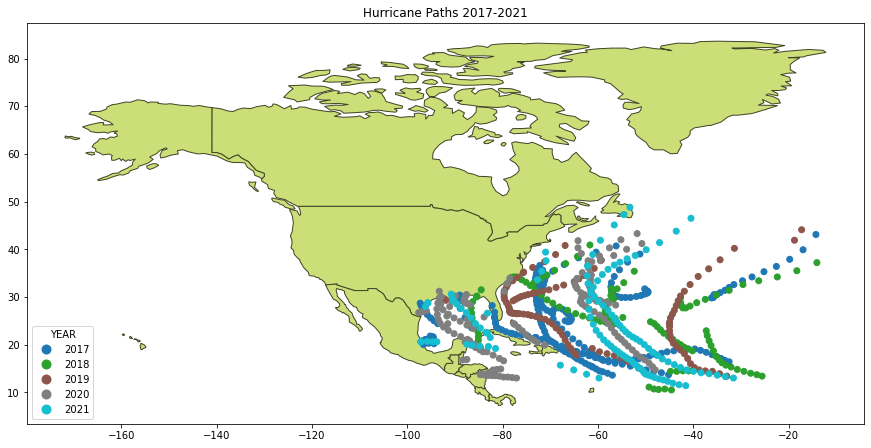

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline


df = pd.DataFrame(geodata)
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")
fig, gax = plt.subplots(figsize=(15,16))

# By only plotting rows in which the continent is 'North America' we only plot NA.
base = world.query("continent == 'North America'").plot(ax=gax,
                                                        legend=True,
                                                        edgecolor='#404626',
                                                        color='#ccde77',
                                                        legend_kwds={'label': "Population by Country",
                                                                     'orientation': "horizontal"})

# world.apply(lambda x: ax.annotate(text=x['iso_a3'], xy=(x['centroid'].coords[0][0],x['centroid'].coords[0][1]-5), ha='center'), axis=1)
gdf.plot(column='YEAR',
         ax=base,
         categorical=True,
         legend=True,
         legend_kwds={'loc': 'lower left', 'title':"YEAR",});

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_title('Hurricane Paths 2017-2021')

plt.show()